In [1]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

Installing C:\Users\josep\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\josep\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\josep\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\josep\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [2]:
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [6]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [31]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "for" "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just",\
    "to", "in", "so", "also","on","there", "for", "would"]
    
    # LEARNER CODE START HERE
    count_dict = {}
    new_file = ''
    for letters in file_contents:
        if letters.isalpha()==1 or letters==' ':
            new_file+=letters
    words = new_file.split()
    words = (x.lower() for x in words)
    for word in words:
        if word not in punctuations and word not in uninteresting_words:
            if word in count_dict:
                count_dict[word]=count_dict[word]+1
            else:
                count_dict[word]=1
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(count_dict)
    print(sorted(count_dict.items(), key=lambda x:x[1]))
    return cloud.to_array()


[('httpsmediumcomgoustoengineeringtechbrunchonthefutureofdatasciencecedddfabon', 1), ('sciencejoseph', 1), ('cooperso', 1), ('ive', 1), ('amazing', 1), ('company', 1), ('grown', 1), ('unbelievable', 1), ('joined', 1), ('april', 1), ('tech', 1), ('meant', 1), ('faced', 1), ('sorts', 1), ('scaling', 1), ('challenges', 1), ('particularly', 1), ('interesting', 1), ('rapid', 1), ('places', 1), ('efficiency', 1), ('somewhat', 1), ('rare', 1), ('among', 1), ('awareness', 1), ('got', 1), ('wondering', 1), ('evolve', 1), ('st', 1), ('overhypedwhat', 1), ('scientistwell', 1), ('something', 1), ('along', 1), ('lines', 1), ('solves', 1), ('complex', 1), ('multidisciplinary', 1), ('combines', 1), ('computer', 1), ('relatively', 1), ('loose', 1), ('descriptions', 1), ('long', 1), ('skill', 1), ('workspaces', 1), ('visualisation', 1), ('application', 1), ('understanding', 1), ('abstract', 1), ('theres', 1), ('hard', 1), ('rule', 1), ('skills', 1), ('list', 1), ('extensive', 1), ('depends', 1), ('need

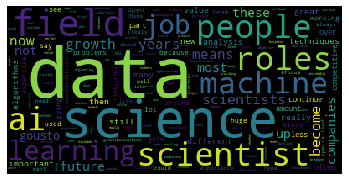

In [32]:
# Display and saving wordcloud image
fig, ax= plt.subplots()
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()
fig.savefig('wordcloud.jpeg', dpi=200, bbox_inches='tight', pad_inches = 0)